In [2]:
# Move to the directory where the notebook is located
# and set directory to Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication
%cd ..

c:\Users\duong\Downloads\Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication


C:\Users\duong\AppData\Roaming\Python\Python313\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
import os
print(os.getcwd())

c:\Users\duong\Downloads\Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication


# Model information

In [4]:
# Đảm bảo đang ở Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication
# Cài đặt package
!pip install -e .

Obtaining file:///C:/Users/duong/Downloads/Deep_Learning-Based_Signature_Forgery_Detection_for_Personal_Identity_Authentication
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for signature_verification (pyproject.toml): started
  Building editable for signature_verification (pyproject.toml): finished with status 'done'
  Created wheel for signature_verification: filename=signature_verification-0.1.0-0.editable-py3-none-any.whl size=3201 sha256=ace7e609ec36b7ec96c7b2189fb1141ff013957808a7f5f266ec55321fac4e12
  Stored in direct


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# Import module
from utils.helpers import load_config,get_model_from_Kaggle,load_model
print("Package installed and imported successfully!")

Package installed and imported successfully!


In [6]:
#Config information
config = load_config('configs/config_siamese.yaml')
print(config)

{'model': {'name': 'siamese', 'backbone': 'resnet18', 'feature_dim': 512, 'kaggle_handle': 'giahuytranviet/siamese-verification-model/pyTorch/default'}, 'training': {'batch_size': 32, 'learning_rate': 0.001, 'optimizer': 'adam', 'num_epochs': 50, 'margin': 0.5, 'scheduler': 'cosine'}, 'dataset': {'original_data_path': None, 'forgeries_data_path': None, 'input_size': [220, 150]}, 'device': 'cuda', 'logging': {'log_dir': './logs/', 'checkpoint_dir': './checkpoints/', 'save_freq': 5}}


# Test Model

## Data import

In [40]:
import kagglehub
import random
import numpy as np

In [16]:
pathA = kagglehub.dataset_download("divyanshrai/handwritten-signatures")
print("Path to dataset files [divyanshrai]:", pathA) #dataset A

100%|██████████| 370M/370M [00:14<00:00, 26.6MB/s] 

Extracting files...


Path to dataset files [divyanshrai]: C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2


## Preprocess Data Name

In [20]:
folder_path = r'C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2\sample_Signature\sample_Signature\genuine'

In [21]:
from collections import defaultdict

class preprocessor(str):
    def __init__(self, path):
        self.path = path
        self.id_counter = defaultdict(int) 

    def _rename_file(self, file):
        id1 = int(file[4:7]) # str - 3 chữ số đầu xxx
        id2 = int(file[7:9]) # str - 2 chữ số giữa yy
        id3 = int(file[9:12]) #str - 3 chữ số cuối zzz

        if 'forged' in self.path:
            self.id_counter[id3] += 1
            new_name = f"forgeries_{id3}_{self.id_counter[id3]}.png"
        
        elif 'genuine' in self.path:
            new_name = f"original_{id1}_{id2}.png"
        return new_name

    # Đổi tên các file trong thư mục
    def do_rename(self):
        files = sorted(os.listdir(self.path)) 

        for file in files:
            new_file = self._rename_file(file)

            old_path = os.path.join(self.path, file)
            new_path = os.path.join(self.path, new_file)

            print(f"Đổi {file} → {new_file}")
            os.rename(old_path, new_path)

In [22]:
test = preprocessor(folder_path)
test.do_rename()

Đổi NFI-00101001.png → original_1_1.png
Đổi NFI-00102001.png → original_1_2.png
Đổi NFI-00103001.png → original_1_3.png
Đổi NFI-00104001.png → original_1_4.png
Đổi NFI-00105001.png → original_1_5.png
Đổi NFI-00201002.png → original_2_1.png
Đổi NFI-00202002.png → original_2_2.png
Đổi NFI-00203002.png → original_2_3.png
Đổi NFI-00204002.png → original_2_4.png
Đổi NFI-00205002.png → original_2_5.png
Đổi NFI-00301003.png → original_3_1.png
Đổi NFI-00302003.png → original_3_2.png
Đổi NFI-00303003.png → original_3_3.png
Đổi NFI-00304003.png → original_3_4.png
Đổi NFI-00305003.png → original_3_5.png
Đổi NFI-00401004.png → original_4_1.png
Đổi NFI-00402004.png → original_4_2.png
Đổi NFI-00403004.png → original_4_3.png
Đổi NFI-00404004.png → original_4_4.png
Đổi NFI-00405004.png → original_4_5.png
Đổi NFI-00501005.png → original_5_1.png
Đổi NFI-00502005.png → original_5_2.png
Đổi NFI-00503005.png → original_5_3.png
Đổi NFI-00504005.png → original_5_4.png
Đổi NFI-00505005.png → original_5_5.png


In [46]:
dataset = r'C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2\sample_Signature\sample_Signature'

genuines_dir = dataset + r'\genuine'
forgery_dir = dataset + r'\forged'

# Preprocess data: Organize signatures by writer ID
writers = defaultdict(lambda: {'genuine': [], 'forged': []})

# Parse genuine signatures
for fname in os.listdir(genuines_dir):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        parts = fname.split('_')
        if len(parts) == 3 and parts[0] == 'original':
            writer_id = parts[1]  # e.g., '001' from 'original_001_01.png'
            writers[writer_id]['genuine'].append(os.path.join(genuines_dir, fname))

# Parse forged signatures
for fname in os.listdir(forgery_dir):
    if fname.lower().endswith(('.png', '.jpg', '.jpeg')):
        parts = fname.split('_')
        if len(parts) == 3 and parts[0] == 'forgeries':
            writer_id = parts[1]  # e.g., '001' from 'forgery_001_01.png'
            writers[writer_id]['forged'].append(os.path.join(forgery_dir, fname))

print(f"Number of writers: {len(writers)}")
for writer_id, data in list(writers.items())[:5]:  # Print sample
    print(f"Writer {writer_id}: {len(data['genuine'])} genuine, {len(data['forged'])} forged")

# Create pairs for evaluation (500 pairs: 250 genuine-genuine, 250 genuine-forged)
pair_count = 500
pairs, labels = [], []
half = pair_count // 2
same = diff = 0

# Genuine-genuine pairs
for writer_id, imgs in writers.items():
    while same < half and len(imgs['genuine']) >= 2:
        a, b = random.sample(imgs['genuine'], 2)
        pairs.append((a, b))
        labels.append(1)
        same += 1

# Genuine-forged pairs
for writer_id, imgs in writers.items():
    while diff < half and imgs['genuine'] and imgs['forged']:
        a = random.choice(imgs['genuine'])
        b = random.choice(imgs['forged'])
        pairs.append((a, b))
        labels.append(0)
        diff += 1

print(f"Built {len(pairs)} pairs: {same} genuine-genuine, {diff} genuine-forged")

Number of writers: 30
Writer 10: 5 genuine, 5 forged
Writer 11: 5 genuine, 5 forged
Writer 12: 5 genuine, 5 forged
Writer 13: 5 genuine, 5 forged
Writer 14: 5 genuine, 5 forged
Built 500 pairs: 250 genuine-genuine, 250 genuine-forged


## Statistics  & Model import

In [47]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_auc_score

In [48]:
from losses.contrastive_loss import ContrastiveLoss
from models.siamese_network import SiameseNetwork
from datasets.siamese_dataloader import SiameseSignatureDataset

## Prepare Data

In [49]:
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import torch
from torch.utils.data import DataLoader

seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [52]:
# Transform chung
transform = transforms.Compose([
    transforms.Resize((220, 150)),
    transforms.Grayscale(),  # Đảm bảo ảnh 1 kênh
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.repeat(3, 1, 1)),  # 1 kênh -> 3 kênh
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# Tạo dataset
siamese_test_set = SiameseSignatureDataset(
    org_dir=r'C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2\sample_Signature\sample_Signature\genuine',
    forg_dir=r'C:\Users\duong\.cache\kagglehub\datasets\divyanshrai\handwritten-signatures\versions\2\sample_Signature\sample_Signature\forged',
    transform=transform
)

siamese_test_loader = DataLoader(siamese_test_set, num_workers=0, batch_size=32, shuffle=True)

In [53]:
# Kiểm tra Siamese Dataset
print(f"Siamese Dataset - Total pairs: {len(siamese_test_set)}")
sample_pair, label = siamese_test_set[0]
print(f"Pair shape: {sample_pair[0].shape}, {sample_pair[1].shape}")
print(f"Label: {label}")

Siamese Dataset - Total pairs: 449
Pair shape: torch.Size([3, 220, 150]), torch.Size([3, 220, 150])
Label: 1.0


In [54]:
model_path = r"C:\Users\duong\.cache\kagglehub\models\giahuytranviet\siamese-verification-model\pyTorch\default\1"
model = load_model(model_path, config['model']['backbone'], config['model']['feature_dim'], "siamese") #backbone = resnet18 - feature_dim = 512

device = torch.device(config['device'] if torch.cuda.is_available() else "cpu")
model.to(device)
if torch.cuda.device_count() > 1:
    print(f"Using {torch.cuda.device_count()} GPUs")
    model = torch.nn.DataParallel(model, device_ids=[0, 1])

model.eval()

c:\Users\duong\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\duong\AppData\Local\Programs\Python\Python313\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Model loaded successfully
Model loaded from C:\Users\duong\.cache\kagglehub\models\giahuytranviet\siamese-verification-model\pyTorch\default\1


SiameseNetwork(
  (feature_extractor): ResNetFeatureExtractor(
    (backbone): ResNet(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=

In [77]:
all_distances = []
all_labels = []

with torch.no_grad():
    for (img1, img2), label in siamese_test_loader:
        img1, img2 = img1.to(device), img2.to(device)
        output1, output2 = model(img1, img2)

        distance = torch.norm(output1 - output2, p=2)
        distances = F.pairwise_distance(output1, output2)
        print("Khoảng cách", distance.item())
        all_distances.extend(distances.cpu().numpy())
        all_labels.extend(label.numpy())

Khoảng cách 2.0775232315063477
Khoảng cách 2.6630942821502686
Khoảng cách 1.9729629755020142
Khoảng cách 2.857208251953125
Khoảng cách 2.5964462757110596
Khoảng cách 2.3780035972595215
Khoảng cách 2.4618029594421387
Khoảng cách 3.1287999153137207
Khoảng cách 2.5938374996185303
Khoảng cách 2.7349002361297607
Khoảng cách 2.349599838256836
Khoảng cách 2.740388870239258
Khoảng cách 2.5279579162597656
Khoảng cách 2.4004645347595215
Khoảng cách 0.7487450242042542


In [87]:
threshold = 0.0732128769159317 # có thể điều chỉnh tùy tập dữ liệu
y_pred = [1 if d < threshold else 0 for d in all_distances]

accuracy = accuracy_score(all_labels, y_pred) ### acc bị sai 
auc = roc_auc_score(all_labels, -np.array(all_distances))  # đảo dấu để khoảng cách thấp = giống

print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")

Accuracy: 0.7416
AUC: 0.6723


In [88]:
best_acc = 0
for t in np.linspace(min(all_distances), max(all_distances), 500):
    y_pred = [1 if d < t else 0 for d in all_distances]
    acc = accuracy_score(all_labels, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_t = t
print(f"Best threshold: {best_t}, Best accuracy: {best_acc}")

Best threshold: 0.0732128769159317, Best accuracy: 0.7416481069042317


## Memory Tracker

In [89]:
import psutil
import time
import gc
from tqdm import tqdm
from PIL import Image

class MemoryTracker:
    def __init__(self):
        self.proc = psutil.Process(os.getpid())
        self.start = self.peak = self.end = None

    def start_tracking(self):
        gc.collect()
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
        self.start = self.proc.memory_info().rss / 1e6
        self.peak = self.start

    def update(self):
        cur = self.proc.memory_info().rss / 1e6
        self.peak = max(self.peak, cur)

    def end_tracking(self):
        self.end = self.proc.memory_info().rss / 1e6

    def summary(self):
        return {
            'start_MB': self.start,
            'peak_MB': self.peak,
            'end_MB': self.end,
            'delta_MB': self.end - self.start
        }

In [90]:
tracker = MemoryTracker()
tracker.start_tracking()
t0 = time.time()

sims = []
for idx, (p, q) in enumerate(tqdm(pairs, desc="Computing similarities")):
    img1 = transform(Image.open(p).convert('RGB')).unsqueeze(0).to(device)
    img2 = transform(Image.open(q).convert('RGB')).unsqueeze(0).to(device)
    with torch.no_grad():
        f1 = model.feature_extractor(img1)
        f2 = model.feature_extractor(img2)
    dist = F.pairwise_distance(f1, f2).item()
    sims.append(1.0 / (1.0 + dist))
    if idx % 50 == 0:
        tracker.update()

tracker.end_tracking()
exec_time = time.time() - t0
mem_stats = tracker.summary()
print(f"Execution time: {exec_time:.2f}s")
print("Memory usage (MB):", mem_stats)

Computing similarities: 100%|██████████| 500/500 [00:35<00:00, 14.07it/s]

Execution time: 35.53s
Memory usage (MB): {'start_MB': 749.600768, 'peak_MB': 749.600768, 'end_MB': 528.818176, 'delta_MB': -220.78259200000002}


In [ ]:
threshold = 0.1199
preds = (np.array(sims) > threshold).astype(int)

# Metrics
acc   = accuracy_score(labels, preds)
pre   = precision_score(labels, preds)
rec   = recall_score(labels, preds)
f1    = f1_score(labels, preds)
fpr, tpr, _ = roc_curve(labels, sims)
roc_auc = auc(fpr, tpr)
cm    = confusion_matrix(labels, preds)

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {pre:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")
print(f"ROC AUC  : {roc_auc:.4f}")
print("Confusion Matrix:\n", cm)

## Visualization

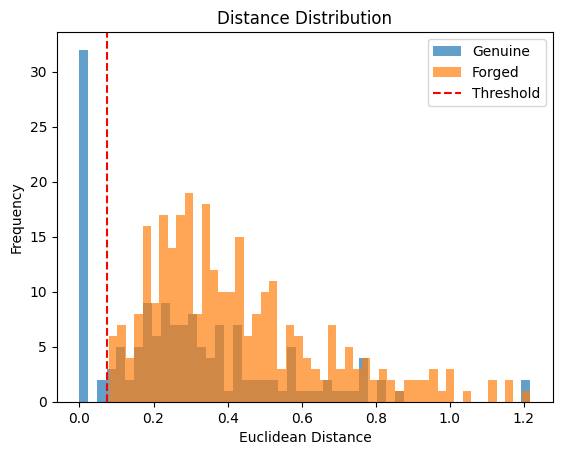

In [91]:
import matplotlib.pyplot as plt

genuine = [d for d, l in zip(all_distances, all_labels) if l == 1]
forged = [d for d, l in zip(all_distances, all_labels) if l == 0]

plt.hist(genuine, bins=50, alpha=0.7, label='Genuine')
plt.hist(forged, bins=50, alpha=0.7, label='Forged')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.legend()
plt.title('Distance Distribution')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.show()

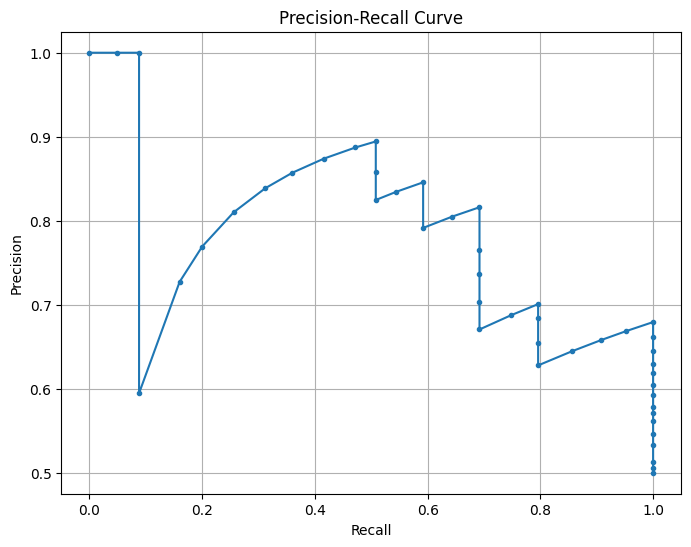

Ngưỡng tối ưu: 0.7094 với F1-score: 0.8091


In [92]:
from sklearn.metrics import precision_recall_curve

# Tính Precision, Recall cho các ngưỡng
precision, recall, thresholds = precision_recall_curve(labels, sims)

# Vẽ đồ thị Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Tìm ngưỡng tối ưu dựa trên F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Thêm 1e-10 để tránh chia cho 0
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print(f"Ngưỡng tối ưu: {optimal_threshold:.4f} với F1-score: {f1_scores[optimal_idx]:.4f}")